In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

products = [
    {"Product_ID": "P001", "Product_Name": "RSQ Jeans", "Category": "Jeans", "Brand": "RSQ", "Price": 50, "Promotion": "BOGO50"},
    {"Product_ID": "P002", "Product_Name": "RSQ Shorts", "Category": "Shorts", "Brand": "RSQ", "Price": 35, "Promotion": "BOGO50"},
    {"Product_ID": "P003", "Product_Name": "2 For $35 Shirts", "Category": "Shirts", "Brand": "Multi", "Price": 20, "Promotion": "2 For $35"},
    {"Product_ID": "P004", "Product_Name": "Graphic Tee", "Category": "Shirts", "Brand": "Nike", "Price": 35, "Promotion": "None"},
    {"Product_ID": "P005", "Product_Name": "Graphic Tee", "Category": "Shirts", "Brand": "The North Face", "Price": 40, "Promotion": "None"},
    {"Product_ID": "P006", "Product_Name": "Graphic Tee", "Category": "Shirts", "Brand": "Brixton", "Price": 25, "Promotion": "None"},
    {"Product_ID": "P007", "Product_Name": "Graphic Tee", "Category": "Shirts", "Brand": "Vans", "Price": 30, "Promotion": "None"},
    {"Product_ID": "P008", "Product_Name": "RSQ Plain Tee", "Category": "Shirts", "Brand": "RSQ", "Price": 20, "Promotion": "50% Off"},
]

np.random.seed(42)
dates = pd.date_range(start="2024-06-01", end="2024-06-30", freq='D')
data = []

for date in dates:
    for product in products:
        quantity = np.random.randint(1,10)
        price = product["Price"]
        pairs = quantity // 2
        remainder = quantity % 2
        
        if product["Promotion"] == "BOGO50":
            total_sales = (pairs * (price + price * 0.5)) + (remainder * price)
        elif product["Promotion"] == "50% Off":
            total_sales = (price * quantity) * 0.5
        elif product["Promotion"] == "2 For $35":
            total_sales = (pairs * 35) + (remainder * price)
        else:
            total_sales = price * quantity
        
        data.append({
            "Date": date,
            "Product_ID": product["Product_ID"],
            "Product_Name": product["Product_Name"],
            "Category": product["Category"],
            "Brand": product["Brand"],
            "Price": price,
            "Quantity": quantity,
            "Total_Sales": total_sales,
            "Promotion": product["Promotion"]
        })
        
df = pd.DataFrame(data)
print(df.head())

        Date Product_ID      Product_Name Category           Brand  Price  \
0 2024-06-01       P001         RSQ Jeans    Jeans             RSQ     50   
1 2024-06-01       P002        RSQ Shorts   Shorts             RSQ     35   
2 2024-06-01       P003  2 For $35 Shirts   Shirts           Multi     20   
3 2024-06-01       P004       Graphic Tee   Shirts            Nike     35   
4 2024-06-01       P005       Graphic Tee   Shirts  The North Face     40   

   Quantity  Total_Sales  Promotion  
0         7        275.0     BOGO50  
1         4        105.0     BOGO50  
2         8        140.0  2 For $35  
3         5        175.0       None  
4         7        280.0       None  


       Product_Name Product_ID Category           Brand  Promotion  Quantity  \
6     RSQ Plain Tee       P008   Shirts             RSQ    50% Off       169   
0  2 For $35 Shirts       P003   Shirts           Multi  2 For $35       159   
3       Graphic Tee       P006   Shirts         Brixton       None       158   
2       Graphic Tee       P005   Shirts  The North Face       None       156   
7        RSQ Shorts       P002   Shorts             RSQ     BOGO50       154   
5         RSQ Jeans       P001    Jeans             RSQ     BOGO50       143   
1       Graphic Tee       P004   Shirts            Nike       None       140   
4       Graphic Tee       P007   Shirts            Vans       None       134   

   Total_Sales  
6       1690.0  
0       2825.0  
3       3950.0  
2       6240.0  
7       4182.5  
5       5550.0  
1       4900.0  
4       4020.0  
       Product_Name Product_ID Category           Brand  Promotion  Quantity  \
2       Graphic Tee       P005   Shirts  The N

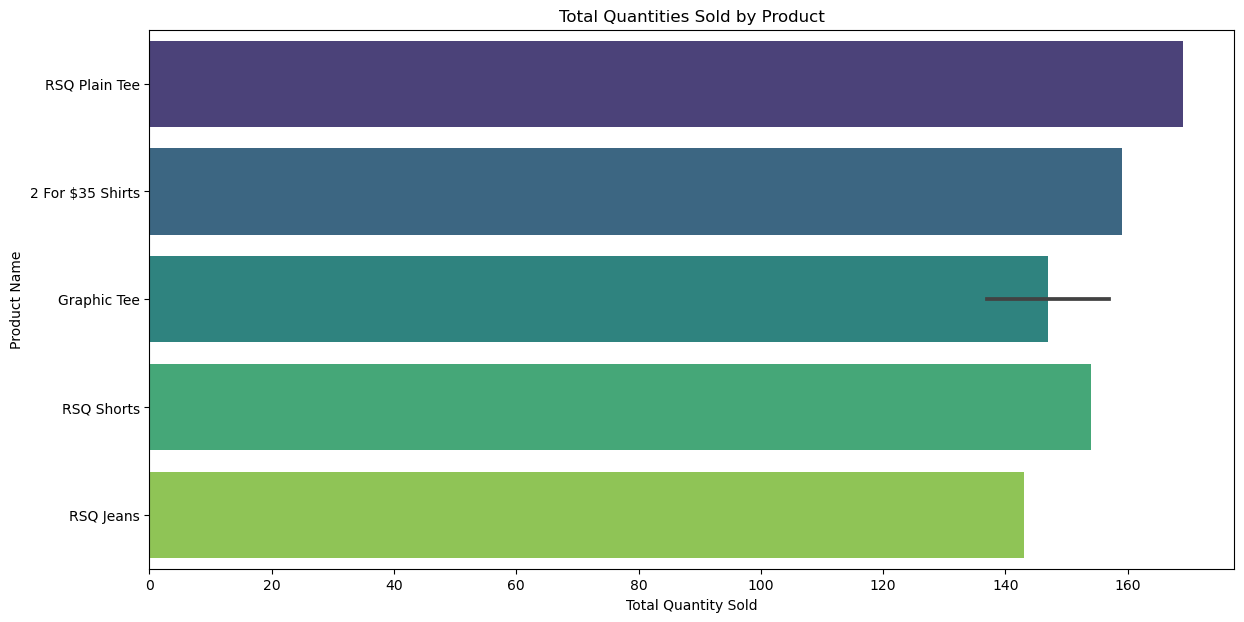

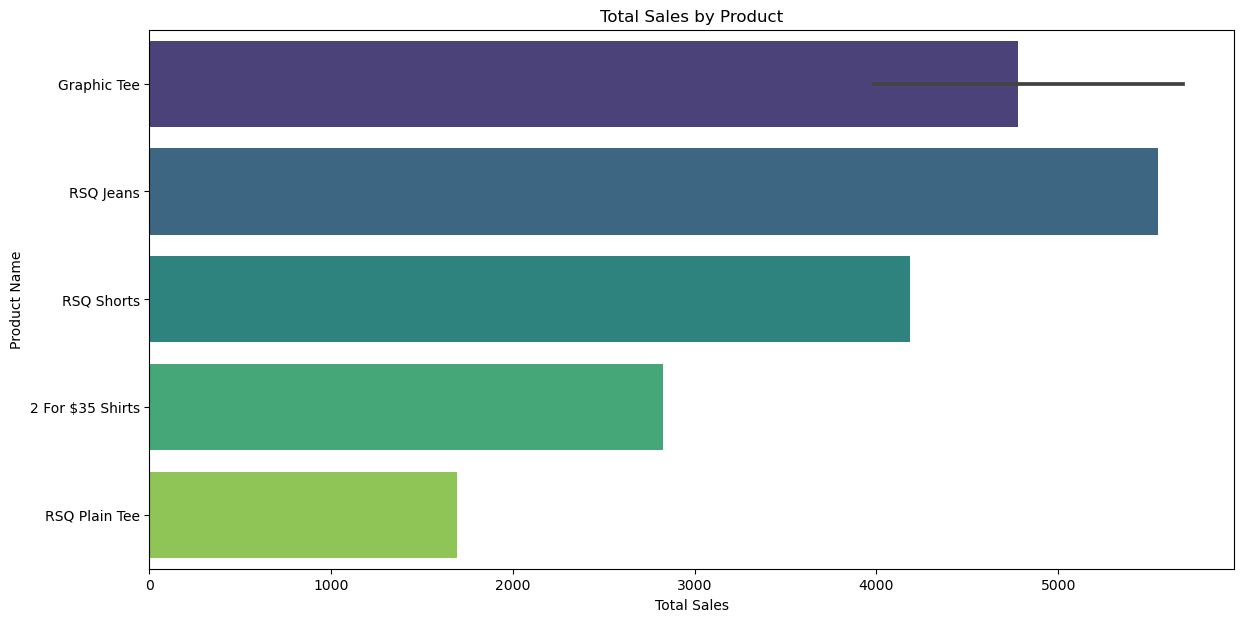

In [5]:
product_sales = df.groupby(['Product_Name', 'Product_ID', 'Category', 'Brand', 'Promotion']).agg({
    'Quantity': 'sum',
    'Total_Sales': 'sum'
}).reset_index()

product_sales_sorted_quantity = product_sales.sort_values(by='Quantity', ascending=False)

product_sales_sorted_sales = product_sales.sort_values(by='Total_Sales', ascending=False)

print(product_sales_sorted_quantity)
print(product_sales_sorted_sales)

plt.figure(figsize=(14, 7))
sns.barplot(x='Quantity', y='Product_Name', data=product_sales_sorted_quantity, palette='viridis')
plt.title('Total Quantities Sold by Product')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Total_Sales', y='Product_Name', data=product_sales_sorted_sales, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()